# Medical Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, a dataset containing information from 100 thousand medical appointments in Brazil focused on the question of whether or not patients show up for their appointment is the be analyzed. The columns in the dataset are;
1. ScheduledDay which tells us on what day the patient set up their appointment. 
2. Neighborhood which indicates the location of the hospital. 
3. Scholarship which indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. PatientId gives information about the Patient while AppointmentID assigns unique code to each appointment.
5. The Age column specifies the age of the patient while the Sex column states the sex of the patient. Here M stands for Male and F for Female
6. The dataset also contains the columns Hypertesion, Diabeties, Alcoholism and Handicap which states if the patient is Hypertesive, Diabetic, an alcoholic or Handicap. A 0 on this columns shows that the patient is not.
7. The Sms_received column states whether the patient received sms or not. 
8. And lastly the No-show column which says whether the patient showed up for the appointment or not it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Questions for Analysis: 
>I would like to investigate the following question:
> 1. Is the SMS effective?
> 2. Does Age determine if a patient shows up or not
> 3. Does Neighbourhood have any impact on a patient showing up or not?

I want to start by importing the neccessary packages as well as read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
# I will also Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.3MB/s ta 0:00:0110% |                                | 20kB 10.4MB/s eta 0:00:02    3% |█▎                              | 409kB 13.6MB/s eta 0:00:01    7% |██▌                             | 808kB 7.1MB/s eta 0:00:02    11% |███▊                            | 1.2MB 7.0MB/s eta 0:00:02    16% |█████▎                          | 1.7MB 8.5MB/s eta 0:00:02    23% |███████▋                        | 2.5MB 5.5MB/s eta 0:00:02    27% |████████▊                       | 2.9MB 9.4MB/s eta 0:00:01    34% |███████████                     | 3.6MB 7.2MB/s eta 0:00:01    43% |██████████████                  | 4.6MB 7.6MB/s eta 0:00:01    46% |███████████████                 | 4.9MB 9.0MB/s eta 0:00:01    50% |████████████████                | 5.2MB 7.1MB/s eta 0:00:01    53% |█████████████████▏              | 5.6MB 9.8MB/s eta 0:00:01    70% |██████████████████████▋         | 7.4MB 7.4MB/s eta 0:00:01    78% |█████████████████████████▏      | 8.2MB 10.

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties

After loading the dataset successfully, let's check the number of entries in the set

In [3]:
df.shape

(110527, 14)

Now, I want to see some statistics.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is no roll column with missing value and all other thins look normal except for the minimum age which is -1. I will take care of that later.

Now, I want to check the data type of all the columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I will like to take a look at the number of unique resposes in each column

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The dataset consists of 62299 patients, 110527 appointments scheduled over 103549 day. The number of days for the appointment is 27 in 81 different health centers/hospitals. It involves 104 different ages, both male and female. There are two values each for scholaship, hypertension, diabetes, alcoholism, sms_received and no-show, which can be interpreted as YES and NO or TRUE and FALSE. Handicap has five unique values which could represent different types of disabilities.

Let's count the number of negative values in Age.

In [7]:
df.query('Age<0').count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

There is a row with a negative Age and it needs to be dropped. Also, there is need to check for duplicated rows.

In [8]:
df.duplicated().sum()

0


### Data Cleaning
> In this section, I will get rid of thing that are not required for the analysis and re-arrange where neccessary. 
 

Firs of all, I will get rid of the row with age -1

In [9]:
df.drop(df[df['Age'] <0].index, inplace = True)
df.shape

(110526, 14)

Its now time to drop columns that does not add to this project.

In [10]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I have to rename the Handcap and Hipertension columns as Handicap and Hypertension respectively.

In [11]:
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace =True) 

To comfirm

In [12]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


I will like to confirm how many Handicaps are there in the data set and how many were labeled with numbers other than 1

In [13]:
df.query('Handicap > 0').count()

Gender           2241
Age              2241
Neighbourhood    2241
Scholarship      2241
Hypertension     2241
Diabetes         2241
Alcoholism       2241
Handicap         2241
SMS_received     2241
No-show          2241
dtype: int64

In [14]:
df.query('Handicap > 1').count()

Gender           199
Age              199
Neighbourhood    199
Scholarship      199
Hypertension     199
Diabetes         199
Alcoholism       199
Handicap         199
SMS_received     199
No-show          199
dtype: int64

There are 2241 Handicaps and 199 of them were labeled with numbers other than 1, so I have assumed numbers other than 0 were used to represent different types of disabilities, so I decided to change them all to 1 so as to have **Disables** and **Non-disables**

In [15]:
df['Handicap'] = df['Handicap'].replace([2,3,4],[1,1,1])

Check:

In [16]:
df.query('Handicap > 1').count()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hypertension     0
Diabetes         0
Alcoholism       0
Handicap         0
SMS_received     0
No-show          0
dtype: int64

I will replace hyphen with underscores and uppercase with lowercase labels

In [17]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

# confirm changes
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
> In this section, I shall be using some visuals to view the dataset and make few point of it.

### Research Question 1: Is the SMS effective?

I will like to have the general picture of the dataset

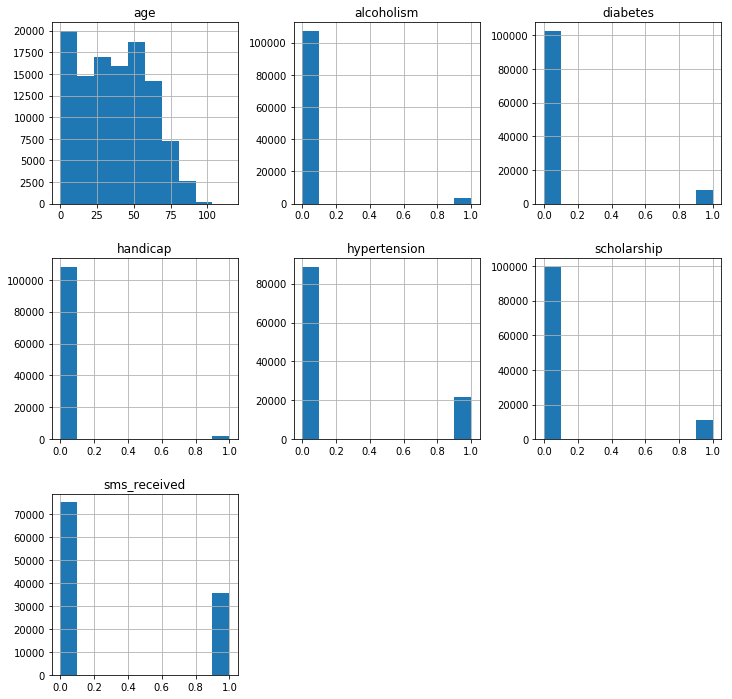

In [18]:
df.hist(figsize= (12,12));

It can be concluded that the larger percentage of patients are below 70 years of age and only about 35 percent received sms

Now, let's check if patients who received sms still missed the appointment

In [19]:
df['no_show']=df['no_show'].replace(['Yes', 'No'], [1, 0])

Changes the response in no_show column to 0s ans 1s from No and Yes, respectively

In [20]:
df['no_show']=df['no_show'].astype(int)

Changes the data type of no_show column from string to int

Now, i want to draw the histogram

In [21]:
missed = df.no_show == True
show_up = df.no_show == False

In [22]:
df_missed = df.sms_received[missed] 
df_show = df.sms_received[show_up] 

In [23]:
age_m = df.age[missed] 
age_s = df.age[show_up] 

In [35]:
def plot(arr1, arr2, x_label, y_label, label1, label2 ):
    plt.hist(arr1, color='b', alpha=0.5, label = label1) 
    plt.hist(arr2, color='r', alpha=0.5, label = label2)
    plt.xlabel(x_label) 
    plt.ylabel(y_label) 
    plt.legend ()

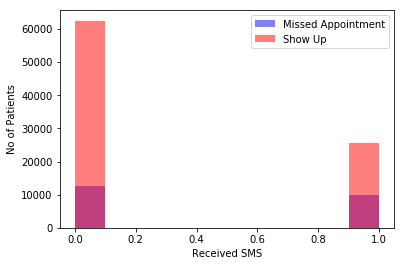

In [36]:
plot(df_missed, df_show, 'Received SMS', 'No of Patients', 'Missed Appointment', 'Show Up') 

This shows that the percentage of those who received sms and did not show up is very small compared to who did not receive . 

### Research Question: Does age determine if a patient shows up or not?

I would also like to check the relationship between age and not showing up

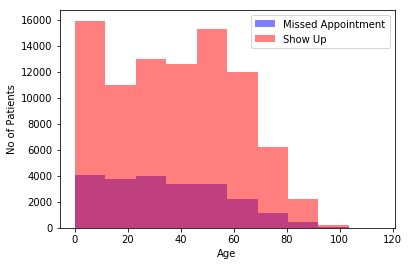

In [37]:
plot(age_m, age_s, 'Age', 'No of Patients', 'Missed Appointment', 'Show Up') 

It seems that the older a patient is, the higher the tendency that he/she wont show up. Also teenagers, patients in early 20's and early 40's seems to top the chat

### Research Question: Does Location have an impact on patients showing up for appointments?

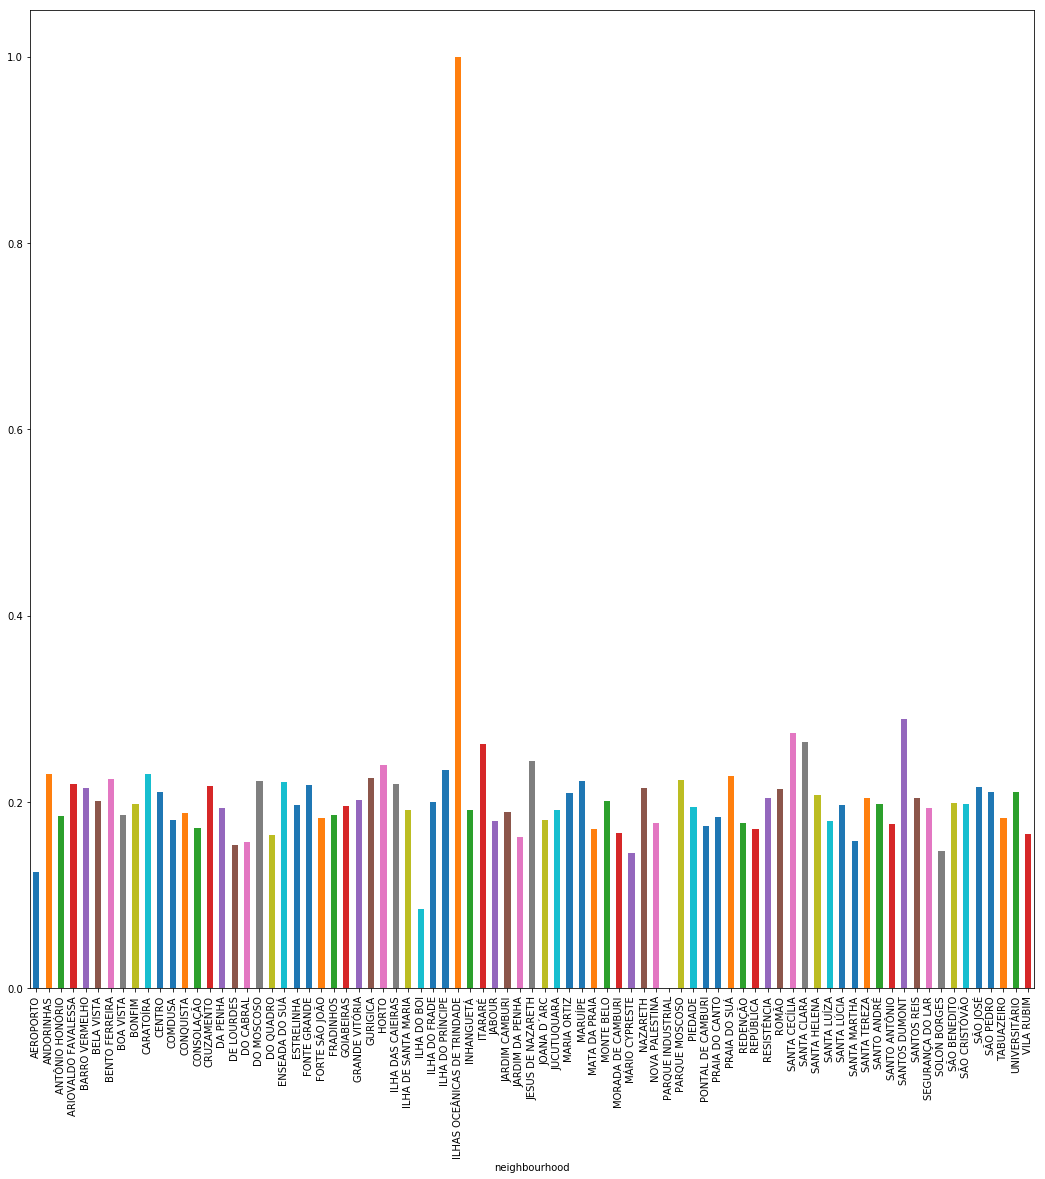

In [38]:
df.groupby('neighbourhood').no_show.mean().plot(kind= 'bar', figsize=(18,18));

Almost all patients at **Ilhas Oceanicas de Trindade** did not show up

<a id='conclusions'></a>
## Conclusions

> Based on the available tools, the following could be pointed out, although they are tentative as further investigation needs to be done to arrive at a conclusion:
1. There seems to be higher percentage of those who did not received sms that did not show up is very small compared to who received sms.
2. Older patients appeared to miss their appointments than younger ones, while teenages, early 20's and early 40's seems to take the lead. And lastly,
3. Almost all patients at **Ilhas Oceanicas de Trindade** did not show up

### Limitations:
> The following are the limitations to this analysis:
1. I can not decide whether there is any correlation between two attributes as that will require using the statistical test of hypothesis. 
2. I would have love to investigate how diabetic patients turn up for their appointments with respect to hypertensive patients, but they are both given in different columns. 
3. More information about the hospitals/medical centers, such as its distance from the nearest commercial/residential center, would be required to compare as another factor 


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0